# IPL 2024 Auctions
## Webscraping Project
Analyzed the data for the reccently held auctions for the IPL 2024 Season. 

In [107]:
import requests
from bs4 import BeautifulSoup
import pandas as pd         
from matplotlib import pyplot as plt

In [108]:
url = "https://www.iplt20.com/auction"
r = requests.get(url)
print(r.status_code)

200


In [118]:
soup = BeautifulSoup(r.text, "lxml")

In [119]:
auction_table = soup.find("table", class_="ih-td-tab auction-tbl")
table_headers = [h.text for h in auction_table.find_all("th", class_="skip-filter")]
print(table_headers)

['TEAM', 'FUNDS REMAINING', 'OVERSEAS PLAYERS ', 'TOTAL PLAYERS']


In [120]:
df = pd.DataFrame(columns=table_headers)
df

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS


In [121]:
rows = auction_table.find_all("tr")

for row in rows[1:]:
    row_data = [(i.text).strip() for i in row.find_all("td")]
    row_data[1] = row_data[1][1:].replace(",", "")
    df.loc[len(df)] = row_data

In [122]:
display(df)

,TEAM,FUNDS REMAINING,OVERSEAS PLAYERS,TOTAL PLAYERS
0,Chennai Super Kings,10000000,8,25
1,Delhi Capitals,99000000,8,25
2,Gujarat Titans,78500000,8,25
3,Kolkata Knight Riders,13500000,8,23
4,Lucknow Super Giants,9500000,8,25
5,Mumbai Indians,10500000,8,25
6,Punjab Kings,41500000,8,25
7,Rajasthan Royals,2000000,8,22
8,Royal Challengers Bangalore,28500000,8,25
9,Sunrisers Hyderabad,32000000,8,25


In [123]:
df.dtypes

TEAM                 object
FUNDS REMAINING      object
OVERSEAS PLAYERS     object
TOTAL PLAYERS        object
dtype: object

In [124]:
df["FUNDS REMAINING"] = df["FUNDS REMAINING"].astype(int)

In [125]:
df.to_csv("IPL2024_Auction.csv", index=False)

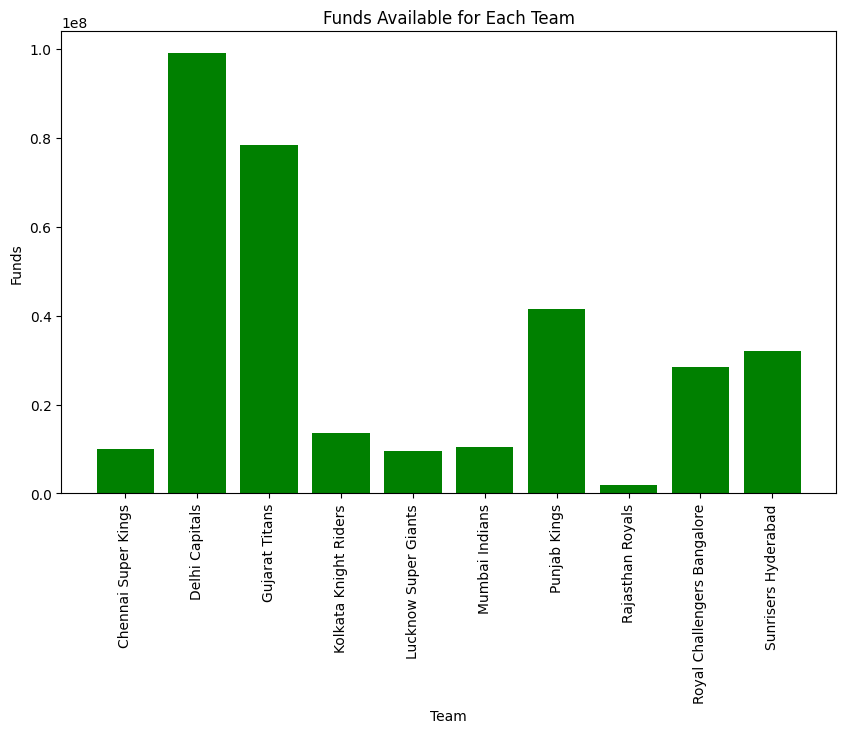

In [128]:
# Creating a bar chart
plt.figure(figsize=(10,6))
plt.bar(df['TEAM'], df['FUNDS REMAINING'], color='green')

# Rotate labels
plt.xticks(rotation=90) # Or rotation=90

# Optionally, adjust the font size (smaller values make the font smaller)
plt.xticks(fontsize=10) 

# Adding title and labels
plt.title('Funds Available for Each Team')
plt.xlabel('Team')
plt.ylabel('Funds')

plt.ylim(0)

# Display the plot
plt.show()